**Step-1) Import Libraries**

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Step-2) Load DataSet**

In [53]:
df = pd.read_excel('City_Power_Consumption.xlsx')

In [55]:
df.head(10)

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
5,6,5.853,76.9,0.081,0.059,0.108,158.0,1,26624.81013
6,7,5.641,77.7,0.080,0.048,0.096,152.0,1,16993.31307
7,8,5.496,78.2,0.085,0.055,0.093,152.0,1,16661.39818
8,9,5.678,78.1,0.081,0.066,0.141,154.0,1,16227.35562
9,10,5.491,77.3,0.082,0.062,0.111,159.0,1,15939.20973


**Step-3) Data Processing**


In [56]:
print(df.isnull().sum())
df = df.dropna()
print(df.describe())


S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64
               S no    Wind Speed  general diffuse flows  diffuse flows  \
count  52145.000000  52145.000000           52145.000000   52145.000000   
mean   26323.875674      1.968434             182.861960      75.195083   
std    15064.070831      2.350838             264.757717     124.433309   
min        1.000000      0.050000               0.004000       0.011000   
25%    13290.000000      0.078000               0.062000       0.122000   
50%    26326.000000      0.086000               4.987000       4.411000   
75%    39362.000000      4.915000             319.600000     101.300000   
max    52416.000000      6.483000            1163.000000     93

In [49]:
#Temperatur and Humidity are object datatype, its not in float.
# Clean 'Temperature' and 'Humidity' columns: extract numeric part and convert to float
for col in ['Temperature', 'Humidity']:
    df[col] = df[col].astype(str).str.extract('([0-9.+-]+)').astype(float)

# Optional: Check the types to confirm they are now float
print(df.dtypes)


S_no                             int64
Temperature                    float64
Humidity                       float64
Wind_Speed                     float64
general_diffuse_flows          float64
diffuse_flows                  float64
Air_Quality_Index_(PM)         float64
Cloudiness                       int64
Power_Consumption_in_A_Zone    float64
dtype: object


/tmp/ipython-input-49-2112311286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.extract('([0-9.+-]+)').astype(float)
/tmp/ipython-input-49-2112311286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.extract('([0-9.+-]+)').astype(float)


In [50]:
print(df.dtypes)

S_no                             int64
Temperature                    float64
Humidity                       float64
Wind_Speed                     float64
general_diffuse_flows          float64
diffuse_flows                  float64
Air_Quality_Index_(PM)         float64
Cloudiness                       int64
Power_Consumption_in_A_Zone    float64
dtype: object


In [ ]:
# Temperature and Humidity are converted into Float.

In [24]:
print(df.dtypes)

S no                              int64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object


In [42]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Columns should not contain space, it it contains space then exception will be thrwon


In [44]:
print(df.columns.tolist())

['S_no', 'Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows', 'diffuse_flows', 'Air_Quality_Index_(PM)', 'Cloudiness', 'Power_Consumption_in_A_Zone']


**Step-4)Exploratory Data Analysis(EDA)**

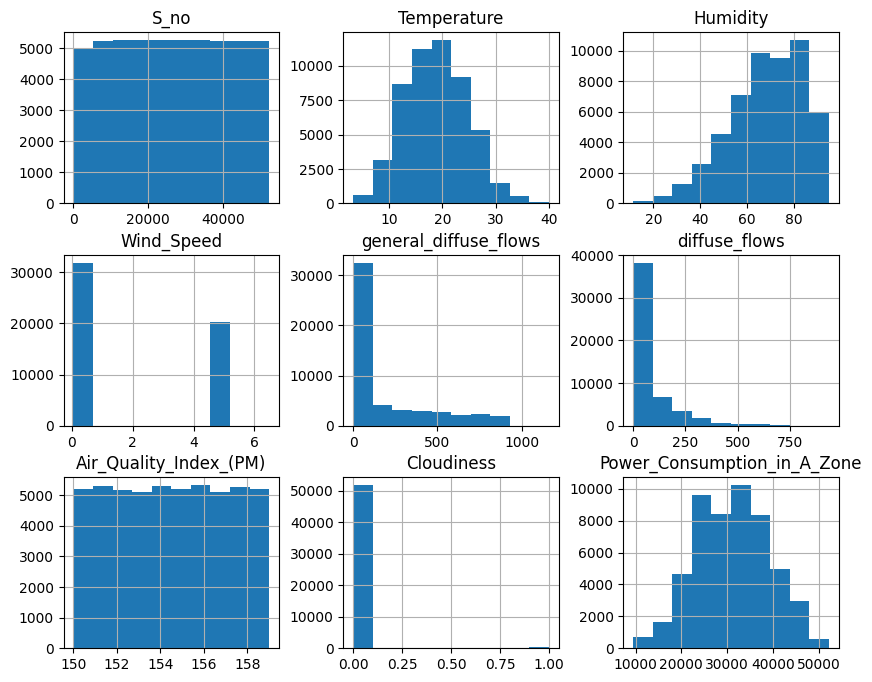

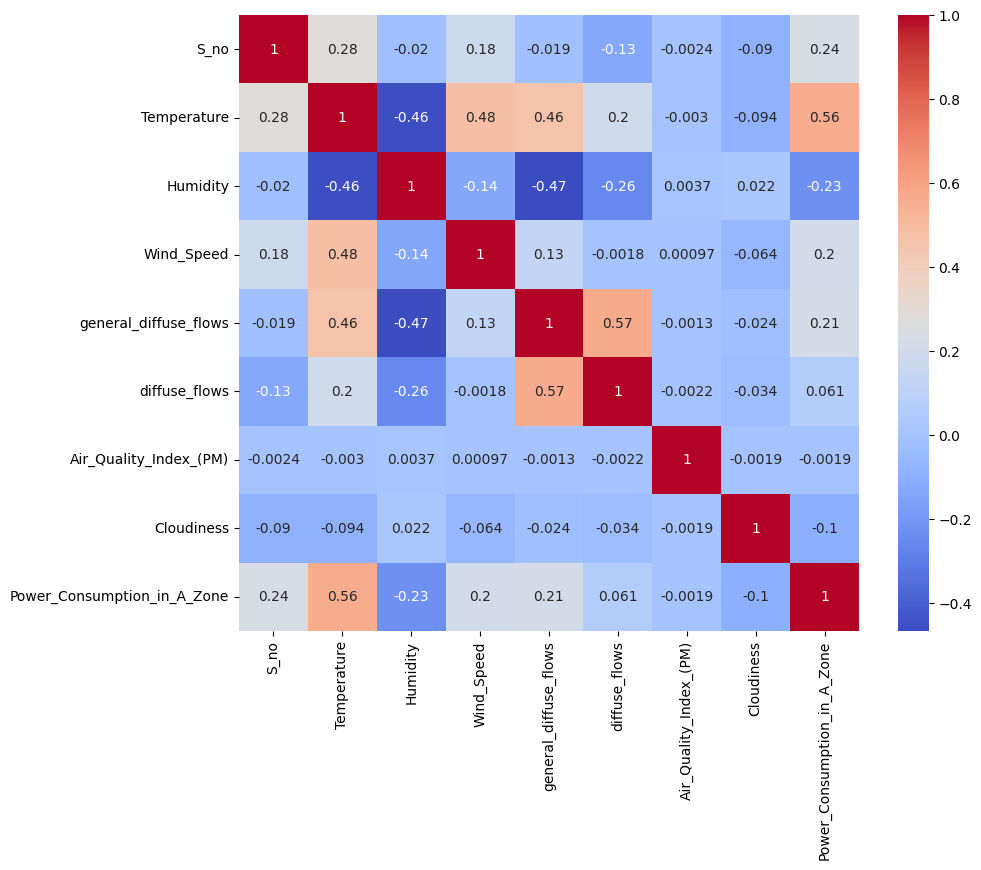

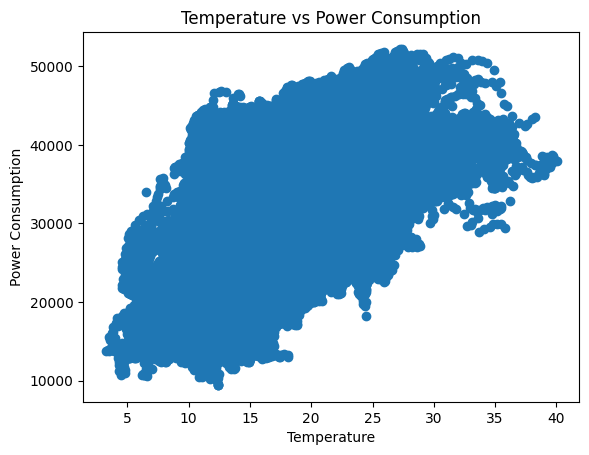

In [51]:
df.hist(figsize=(10,8))
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.scatter(df['Temperature'], df['Power_Consumption_in_A_Zone'])
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.title('Temperature vs Power Consumption')
plt.show()

**Step-5)Model Building**

In [33]:
X = df.drop(['Power_Consumption_in_A_Zone', 'S_no'], axis=1)
y = df['Power_Consumption_in_A_Zone']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Step-6) Model Evaluation**

In [55]:
def evaluate_model(y_true, y_pred):
  print('MAE:' , mean_absolute_error(y_true, y_pred))
  print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
  print('R2 Score:', r2_score(y_true, y_pred))

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Linear Regression:")
evaluate_model(y_test, y_test)

print("\Random Forest:")
evaluate_model(y_test, y_pred_rf)

Linear Regression:
MAE: 0.0
RMSE: 0.0
R2 Score: 1.0
\Random Forest:
MAE: 3371.4019069912974
RMSE: 4860.53644937455
R2 Score: 0.633790663530237


**Step-7) Feature Importance(Random Forest)**

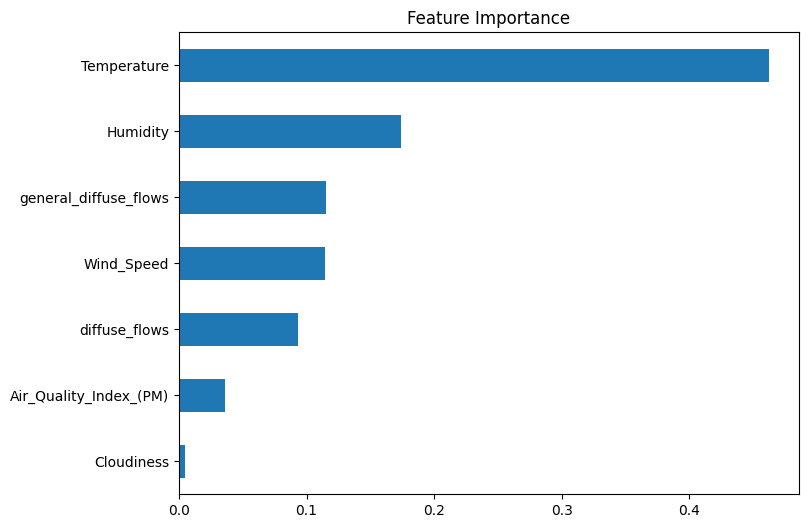

In [56]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance')
plt.show()